# Trees in Camden
This notebook provides an analysis for the trees in Camden. There are three datasets used:
1. Trees - Excel file, contains the list of all the trees in Camden.
2. Environment - csv file, contains the environmental data about each tree in the borough.
3. Common Names Data - json file, contains the common and scientific names of the trees.

# Table of Contents
1. Import the libraries
2. Load the datasets and perform initial exploration
3. Further inspection of datasets
4. Identify missing values for all the three datasets
5. Identify outliers for the trees dataset
6. Identify Identify duplicates for the trees dataset
7. Identify Geolocation issues
8. Identify unmatched data

## 1. Imports
Import the libraries we need to perform the analysis.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## 2. Load Data and Perform Initial Exploration
Loading the data from the supplied data files. 


### 2.1 Trees
The file `"camden_trees.xlsx"` is an Excel file, so we use the `read_excel()` function.

In [2]:
# Creating a Pandas dataframe called trees that contains the contents of the Excel file
trees = pd.read_excel("camden_trees.xlsx")

We can now inspect the first few rows using `head()`.  By default, `head()` displays the first 5 rows.

In [3]:
# Displaying the first few rows
trees.head()

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
0,00060053,1.0,Russell Nurseries Estate,Housing,Vacant Tree Pit,NaT,NaN,NaN,NaN,NaN,E05000135,Hampstead Town,527305,185240,-0.165240,51.551693,"(51.551693, -0.16524)"
1,00057855,1.0,BRECKNOCK JMI (E),Education,Vacant Tree Pit,2019-07-17,2022/2023,NaN,NaN,NaN,E05000131,Cantelowes,529923,184782,-0.127681,51.546984,"(51.546984, -0.127681)"
2,00059953,1.0,Estate 51 Ravenshaw Street,Housing,Ficus carica,NaT,NaN,5.0,4.0,10.0,NaN,NaN,0,0,NaN,NaN,NaN
3,00059915,1.0,ROSARY RC JMI (E),Education,Betula jacquemontii,NaT,NaN,4.0,1.0,6.0,E05000135,Hampstead Town,527249,185261,-0.166051,51.551901,"(51.551901, -0.166051)"
4,00010762,1.0,Holly Lodge Estate,Housing,Ilex x altaclarensis,2017-06-14,2020/2021,14.0,6.0,26.0,E05000137,Highgate,528414,186770,-0.148704,51.565198,"(51.565198, -0.148704)"


It's good to understand the size of the dataset we are dealing with.  The `shape` property does this for us.

In [4]:
# Getting the number of rows and columns
trees.shape

(23444, 17)

If there are lots of columns we can't always see all of them in the `head()` list above.  We can use the `columns` property to get a full list:

In [5]:
# Getting a list of all the columns in the dataframe
trees.columns

Index(['Identifier', 'Number Of Trees', 'Site Name', 'Contract Area',
       'Scientific Name', 'Inspection Date', 'Inspection Due Date',
       'Height In Metres', 'Spread In Metres',
       'Diameter In Centimetres At Breast Height', 'Ward Code', 'Ward Name',
       'Easting', 'Northing', 'Longitude', 'Latitude', 'Location'],
      dtype='object')

In order to process the data properly, we should understand the data type for each column.  Here we understand the datatypes of various columns.

In [6]:
# Listing the data types of each column
trees.dtypes

Identifier                                          object
Number Of Trees                                    float64
Site Name                                           object
Contract Area                                       object
Scientific Name                                     object
Inspection Date                             datetime64[ns]
Inspection Due Date                                 object
Height In Metres                                   float64
Spread In Metres                                   float64
Diameter In Centimetres At Breast Height           float64
Ward Code                                           object
Ward Name                                           object
Easting                                              int64
Northing                                             int64
Longitude                                          float64
Latitude                                           float64
Location                                            obje

### 2.2 Environmental
The file `"camden_trees_environmental.csv"` is a csv file.  We use read_csv function to load it into a Pandas DataFrame.

In [7]:
# Creating a Pandas dataframe called trees_env that contains the contents of the csv file
trees_env = pd.read_csv("camden_trees_environmental.csv")

In [8]:
# Displaying the first few rows
trees_env.head()

,Identifier,Maturity,Physiological Condition,Tree Set To Be Removed,Removal Reason,Capital Asset Value For Amenity Trees,Carbon Storage In Kilograms,Gross Carbon Sequestration Per Year In Kilograms,Pollution Removal Per Year In Grams
0,00055125,Juvenile,Good,No,NaN,115.07,1.6,0.5,5.7
1,00059429,Middle aged,Fair,No,NaN,7518.08,NaN,NaN,NaN
2,00018254,Mature,Fair,No,NaN,20419.63,426.4,8.8,215.2
3,00027155,Mature,Fair,No,NaN,21447.74,448.3,9.6,379.1
4,00041326,Juvenile,Good,No,NaN,524.30,9.9,1.4,12.8


In [9]:
# Getting the number of rows and columns
trees_env.shape

(23415, 9)

In [10]:
# Getting a list of all the columns in the dataframe
trees_env.columns

Index(['Identifier', 'Maturity', 'Physiological Condition',
       'Tree Set To Be Removed', 'Removal Reason',
       'Capital Asset Value For Amenity Trees', 'Carbon Storage In Kilograms',
       'Gross Carbon Sequestration Per Year In Kilograms',
       'Pollution Removal Per Year In Grams'],
      dtype='object')

In [11]:
# Listing the data types of each column
trees_env.dtypes

Identifier                                           object
Maturity                                             object
Physiological Condition                              object
Tree Set To Be Removed                               object
Removal Reason                                       object
Capital Asset Value For Amenity Trees               float64
Carbon Storage In Kilograms                         float64
Gross Carbon Sequestration Per Year In Kilograms    float64
Pollution Removal Per Year In Grams                 float64
dtype: object

<hr/>

### 2.3 Common and Scientific Names
The file `"tree_common_names.json"` is a json file.  We use read_json function to load it into a Pandas DataFrame.

In [12]:
# Creating a Pandas dataframe called trees that contains the contents of the json file
trees_names = pd.read_json("tree_common_names.json")

In [13]:
# Displaying the first few rows
trees_names.head()

,Scientific Name,Common Name
0,Carpinus betulus Lucas,Hornbeam - European
1,Prunus 'Pandora',Cherry - Ornamental
2,Tilia unidentified species,Lime
3,Rosa unidentified species,None
4,Cedrus libani,Cedar of Lebanon


In [14]:
# Getting the number of rows and columns
trees_names.shape

(589, 2)

In [15]:
# Getting a list of all the columns in the dataframe
trees_names.columns

Index(['Scientific Name', 'Common Name'], dtype='object')

In [16]:
# Listing the data types of each column
trees_names.dtypes

Scientific Name    object
Common Name        object
dtype: object

<hr/>

## 3. Further Inspect the Datasets
The initial inspection gave us a very high-level understanding of the data.  We will now drill a bit deeper and try to understand the data column-by-column.

For columns with a string data type (`object` in Pandas) we have **qualitative** data.  We will find out how many *different* values we have in the column, what those values are and the *count* how many of each different value we have.  This will help us understand if the qualitative variable is **binary**, **nominal** or **ordinal**.

For columns with a numeric data type (`int` or `float`) we have **quantitative** data.  Usually integer type variables can the thought of as **discrete** and float type variables can be thought of as **continuous**.  We will find out some summary descriptive statistics for these columns.   



### 3.1 Further Inspect the Trees Dataset
Let's start with the trees dataset.


#### 3.1.a Counts of Values for String Types Columns
We go through each column that is a string (object) type and count the number of rows for each value in the column.  After each one, we classify the data as binary, nominal or ordinal.


**Site Name**

In [17]:
# List of values in Site Name column and their counts
trees["Site Name"].value_counts()

WATERLOW PARK (LS)                         920
Alexandra & Ainsworth Estate               289
Belsize nature reserve, Russell Nursery    278
Holly Lodge Estate                         272
LINCOLN'S INN FIELDS, GARDENS (LS)         193
                                          ... 
GOLDINGTON CRESCENT                          1
ALLCROFT ROAD                                1
WOBURN WALK, LAND BEHIND 4-18                1
KILBURN PRIORY                               1
GOODGE PLACE                                 1
Name: Site Name, Length: 1135, dtype: int64

Site Name is **qualitative nominal**.

**Contract Name**

In [18]:
trees["Contract Area"].value_counts()

Highways              10062
Housing                7500
Parks                  4330
Education              1288
Corporate Landlord      264
Name: Contract Area, dtype: int64

Contract Name is **qualitative nominal**.

**Scientific Name**

In [19]:
trees["Scientific Name"].value_counts()

Platanus x hispanica                                 3340
Tilia europaea                                       1468
Acer pseudoplatanus                                   941
Betula pendula                                        765
Fraxinus excelsior                                    754
                                                     ... 
Vacant Tree Pit (planned: Populus tremula)              1
Liriodendron fastigiata                                 1
Sequoia sempervirens                                    1
Sorbus x hybrida                                        1
Vacant Tree Pit (planned: Acer rubrum 'Amstrong')       1
Name: Scientific Name, Length: 543, dtype: int64

Scientific Name is **qualitative nominal**.

**Ward Code**

In [20]:
trees["Ward Code"].value_counts()

E05000137    2799
E05000143    1832
E05000134    1541
E05000140    1540
E05000139    1463
E05000136    1424
E05000135    1340
E05000138    1293
E05000132    1284
E05000131    1231
E05000133    1229
E05000129    1008
E05000142     989
E05000144     978
E05000130     899
E05000145     853
E05000141     824
E05000128     691
Name: Ward Code, dtype: int64

Ward Code is **qualitative nominal**.

**Ward Name**

In [21]:
trees["Ward Name"].value_counts()

Highgate                          2799
St Pancras and Somers Town        1832
Gospel Oak                        1541
Kilburn                           1540
Kentish Town                      1463
Haverstock                        1424
Hampstead Town                    1340
Holborn and Covent Garden         1293
Fortune Green                     1284
Cantelowes                        1231
Frognal and Fitzjohns             1229
Bloomsbury                        1008
Regent's Park                      989
Swiss Cottage                      978
Camden Town with Primrose Hill     899
West Hampstead                     853
King's Cross                       824
Belsize                            691
Name: Ward Name, dtype: int64

Ward Name is **qualitative nominal**.

<hr/>

#### 3.1.b Descriptive Stats for Numeric Type Columns
We use the `describe()` function to get the descriptive stats for the numeric columns.

For each column, we classify the column as discrete or continuous.


In [22]:
# Getting the descriptive stats for the numeric columns
trees.describe()

,Number Of Trees,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Easting,Northing,Longitude,Latitude
count,23422.000000,23006.000000,23006.000000,23005.000000,23444.000000,23444.000000,23388.000000,23388.000000
mean,1.100034,10.307029,5.997612,32.595262,526762.518171,184085.188662,-0.155145,51.545115
std,1.288041,6.325293,4.132379,26.149994,25835.857212,9121.059755,0.025058,0.013067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.261719,51.512858
25%,1.000000,5.000000,3.000000,12.000000,526583.750000,183665.000000,-0.175734,51.537472
50%,1.000000,9.000000,5.000000,27.000000,528456.500000,184690.000000,-0.148478,51.546669
75%,1.000000,15.000000,8.000000,46.000000,529369.000000,185481.000000,-0.135978,51.554032
max,67.000000,127.000000,88.000000,228.000000,531514.000000,196188.000000,-0.105858,51.650843


In [23]:
# data types
trees.dtypes

Identifier                                          object
Number Of Trees                                    float64
Site Name                                           object
Contract Area                                       object
Scientific Name                                     object
Inspection Date                             datetime64[ns]
Inspection Due Date                                 object
Height In Metres                                   float64
Spread In Metres                                   float64
Diameter In Centimetres At Breast Height           float64
Ward Code                                           object
Ward Name                                           object
Easting                                              int64
Northing                                             int64
Longitude                                          float64
Latitude                                           float64
Location                                            obje

#### Finding out if floats are really floats or ints with nulls.


In [24]:
trees['Number Of Trees'].unique()

array([ 1.,  2.,  3.,  0., nan,  5.,  6.,  7., 18.,  8., 65.,  4., 10.,
        9., 11., 50., 12., 15., 52., 40., 33., 13., 20., 67., 21., 32.,
       24., 26., 16., 25., 51.])

Number of trees is an integer with nulls.

In [25]:
trees['Height In Metres'].unique()

array([  nan,   5. ,   4. ,  14. ,   9. ,   0. ,   2. ,   2.5,   8. ,
        13. ,  17. ,  10. ,   3. ,  19. ,   7. ,   6. ,   1.8,  15. ,
        12. ,   1.5,  16. ,  20. ,  21. ,  24. ,  25. ,   2.7,  18. ,
        11. ,  26. ,  22. ,   0.5,  16.1,  27. ,  28. ,   2.3,  22.3,
        38. ,  15.5,  29. ,  23. ,  34. ,   3.5,   2.6,   1. ,   5.5,
        22.5,   2.2,  36. ,  31. ,  96. ,  13.6, 127. ,  14.7,   4.5,
        30. ,  35. ,  32. ,   9.4,  11.8,  33. ,  40. ,   2.1,   6.5,
        41. ,  23.1,  37. ,  39. ,  12.5,   7.5,  13.7,  31.6,  23.8,
         0.2,  12.3,  15.7,   6.8,   9.3,   3.8,  24.9,  17.4,   2.8,
         3.2,  13.9,  12.4,  10.2,  10.8,  24.5,  30.4,   9.8,  11.4,
        23.4,   3.7,  11.6,   7.7,   8.3,   3.6,  17.5,  19.5])

Height in Metres is a float.

In [26]:
trees['Spread In Metres'].unique()

array([  nan,  4.  ,  1.  ,  6.  ,  7.  ,  0.  ,  1.5 ,  5.  ,  9.  ,
       10.  ,  3.  ,  2.  , 13.  ,  2.5 , 12.  , 15.  , 14.  ,  8.  ,
       11.  ,  0.6 ,  1.8 , 17.  , 20.  , 18.  , 16.  , 22.  , 19.  ,
        5.5 , 26.  ,  1.4 , 23.  , 21.  , 28.  ,  1.2 ,  0.5 ,  3.5 ,
       24.  ,  1.3 ,  1.6 , 30.  ,  1.7 , 27.  ,  4.2 , 11.02,  0.7 ,
        6.5 ,  4.5 , 31.  , 25.  ,  0.8 ,  0.3 ,  2.2 ,  2.8 ,  1.65,
       29.  , 88.  ])

Spread in Metres is a float.

In [27]:
trees['Diameter In Centimetres At Breast Height'].unique()

array([  nan,  10. ,   6. ,  26. ,  29. ,   5. ,   0. ,   4. ,  12. ,
        59. ,  52. ,  23. ,  50. ,  63. ,  15. ,   3. ,  49. ,  42. ,
        14. ,  19. ,   9. ,  70. ,  32. ,  28. ,  34. ,  20. ,  17. ,
        27. ,  37. ,   8. ,  45. ,  18. , 119. ,   7. ,  38. ,  55. ,
        41. ,  75. ,  31. ,  25. ,  11. ,  30. ,  43. ,  68. ,  92. ,
        16. ,  35. ,  58. ,  72. ,  64. ,  13. ,  61. ,  69. ,  33. ,
        47. ,  67. , 109. , 106. ,  24. ,  51. ,  40. ,  22. ,  60. ,
        39. ,  46. ,  57. ,  21. ,  54. , 117. ,  44. ,  82. , 114. ,
        65. ,  84. , 118. ,   1. ,  89. ,  53. ,  36. ,  93. ,  88. ,
        86. , 163. ,  66. ,  81. ,  74. , 100. ,  48. ,  73. ,  95. ,
       129. ,  62. ,  85. ,  56. ,   3.5, 161. ,  71. , 105. , 102. ,
        80. ,  87. , 101. ,  76. , 113. , 108. , 160. , 132. ,  90. ,
       145. , 130. ,  79. , 228. , 110. ,  83. ,  78. , 122. , 170. ,
       115. ,   2. ,  77. , 107. ,  96. , 126. ,  91. , 104. , 158. ,
        99. ,  94. ,

Diameter In Centimetres At Breast Height is a float.

In [28]:
trees['Latitude'].unique()

array([51.551693, 51.546984,       nan, ..., 51.54329 , 51.545726,
       51.531863])

Latitude is a float.

In [29]:
trees['Longitude'].unique()

array([-0.16524 , -0.127681,       nan, ..., -0.196884, -0.204206,
       -0.173397])

Longitude is a float.

In [30]:
trees['Easting'].unique()

array([527305, 529923,      0, ..., 527733, 524398, 525944], dtype=int64)

Easting is an integer.

In [31]:
trees['Northing'].unique()

array([185240, 184782,      0, ..., 185755, 187062, 187313], dtype=int64)

Northing is an integer.


<hr/>

Classifying the columns as discrete or continuous.


**Discrete**

Number Of Trees <br>
Northing <br>
Easting

**Continuous**

Height In Metres                                   
Spread In Metres                                   
Diameter In Centimetres At Breast Height                                         
Longitude                                          
Latitude                                           


<hr/>

### 3.2 Further Inspect the Environmental Dataset
Now we repeat the above for the environmental dataset.

#### 3.2.a Counts of Values for String Type Columns 
For each string column in the environmental dataset we show the counts of the unique values.

In [32]:
trees_env.dtypes

Identifier                                           object
Maturity                                             object
Physiological Condition                              object
Tree Set To Be Removed                               object
Removal Reason                                       object
Capital Asset Value For Amenity Trees               float64
Carbon Storage In Kilograms                         float64
Gross Carbon Sequestration Per Year In Kilograms    float64
Pollution Removal Per Year In Grams                 float64
dtype: object

In [33]:
trees_env["Identifier"].value_counts()

00055125    1
00001681    1
00008539    1
00019552    1
00032062    1
           ..
00013724    1
00005978    1
00017336    1
00014229    1
00001786    1
Name: Identifier, Length: 23415, dtype: int64

In [34]:
trees_env["Maturity"].value_counts()

Mature            10225
Middle aged        7779
Juvenile           4393
Not Applicable      377
Over Mature         191
Veteran              41
Name: Maturity, dtype: int64

In [35]:
trees_env["Physiological Condition"].value_counts()

Good              12910
Fair               9183
Poor                357
Not applicable      249
Dead                236
Excellent             8
Name: Physiological Condition, dtype: int64

In [36]:
trees_env["Tree Set To Be Removed"].value_counts()

No     23331
Yes       84
Name: Tree Set To Be Removed, dtype: int64

In [37]:
trees_env["Removal Reason"].value_counts()

Dead, dying                    30
Basal decay                    17
Trunk decay                    10
Tree defect                     5
Crown die-back                  5
Dog damage                      3
Unsuitable location             3
Newly planted tree failure      2
Coppiced stump                  1
Touching building/structure     1
Crown decay                     1
Split trunk                     1
Broken/split branch             1
Climber                         1
No defects - work required      1
Suppressed                      1
ATRD                            1
Name: Removal Reason, dtype: int64

<hr/>

#### 3.2.b Descriptive Stats for Numeric Type Columns
For each numeric column in the environmental dataset we show the descriptive stats

In [38]:
# Getting the descriptive stats for all numeric columns
trees_env.describe()

,Capital Asset Value For Amenity Trees,Carbon Storage In Kilograms,Gross Carbon Sequestration Per Year In Kilograms,Pollution Removal Per Year In Grams
count,22982.000000,20555.000000,20555.000000,20555.000000
mean,14056.393047,467.465454,8.675057,217.740316
std,24803.806595,844.926555,8.681446,306.751920
min,0.000000,0.500000,0.000000,0.300000
25%,1035.650000,24.800000,2.200000,29.300000
50%,5443.660000,163.900000,6.100000,108.100000
75%,16781.420000,497.300000,11.700000,297.600000
max,504725.720000,6000.000000,53.800000,8223.700000


In [39]:
# the data types
trees_env.dtypes

Identifier                                           object
Maturity                                             object
Physiological Condition                              object
Tree Set To Be Removed                               object
Removal Reason                                       object
Capital Asset Value For Amenity Trees               float64
Carbon Storage In Kilograms                         float64
Gross Carbon Sequestration Per Year In Kilograms    float64
Pollution Removal Per Year In Grams                 float64
dtype: object

#### Finding out if floats are really floats or ints with nulls.


In [40]:
trees_env["Capital Asset Value For Amenity Trees"].unique()

array([1.1507000e+02, 7.5180800e+03, 2.0419630e+04, ..., 3.3664130e+04,
       3.6269450e+04, 1.4801215e+05])

Capital Asset Value For Amenity Trees is a float.

In [41]:
trees_env["Carbon Storage In Kilograms"].unique()

array([1.6000e+00,        nan, 4.2640e+02, ..., 4.7233e+03, 3.7305e+03,
       4.8100e+02])

Carbon Storage in Kilograms is a float.

In [42]:
trees_env["Gross Carbon Sequestration Per Year In Kilograms"].unique()

array([ 0.5,  nan,  8.8,  9.6,  1.4, 10.1,  0.8,  7.9, 24.2,  2.4,  0.9,
        3. , 14.6,  8.1,  4.1,  1.8, 18.8, 24.4, 13.4,  4.3,  6.5,  1.3,
        0.6,  2.5, 13.1,  2.1,  3.9, 15.9,  1. ,  6.6,  0.4,  3.4,  2.9,
       28.7,  0.7,  1.5, 12.5, 25.4, 11.2,  9. , 23.9,  4.4, 11.5, 11. ,
        8.4, 10.9, 10.7,  6.9,  7. ,  3.8,  3.2,  6.1,  8.6, 30.2,  3.7,
       15. , 30.4,  7.6, 20.1, 10.2,  8.3, 39.9,  0.3,  4.9, 14.3, 13.5,
       16.7,  8.9,  1.6,  4.2,  3.6,  4. ,  6.7,  0.1, 19.7, 24.6,  6.4,
        5.4,  5.9, 12.2,  7.3, 13. ,  7.1, 36.9,  9.3, 18.2, 10. ,  4.7,
        5. , 29.8, 17.8, 18.5, 17.6,  7.2,  4.8,  5.6,  5.3, 10.5, 12.9,
        9.4,  7.8,  1.1, 19.2, 37.3,  2.7, 12.8, 17. , 15.5, 27.6, 34.2,
        5.7,  5.8, 17.3, 20.4,  9.9, 15.6,  7.4, 11.8,  9.2,  2.6, 21.7,
       11.3, 10.8, 29.4, 23.1, 26.5,  1.2, 10.6, 33.6, 23.6, 11.7, 17.4,
       15.1, 16.6,  2.3, 13.3, 16.3, 18.3, 10.4, 19. ,  1.7,  3.3, 14.1,
        5.5, 12.6, 14.5,  3.5,  8.7, 36.6, 17.7,  5

Gross Carbon Sequestration Per Year In Kilograms is a float.

In [43]:
trees_env["Pollution Removal Per Year In Grams"].unique()

array([  5.7,   nan, 215.2, ...,   8. , 399.9,  60.1])

Pollution Removal Per Year In Grams is a float.

<hr/>


Classifying the columns as discrete or continuous.


**Continuous**

Capital Asset Value For Amenity Trees               
Carbon Storage In Kilograms                         
Gross Carbon Sequestration Per Year In Kilograms    
Pollution Removal Per Year In Grams                 

<hr/>

### 3.3 Further Inspect the Common Names Dataset
Now repeating the above for the common names dataset.

#### 3.3.a (Names) Counts of Values for String Type Columns 
For each string column in the common names dataset we show the counts of the unique values.




In [44]:
trees_names.dtypes

Scientific Name    object
Common Name        object
dtype: object

In [45]:
trees_names["Scientific Name"].value_counts()

Cupressocyparis leylandii                             2
Larix decidua                                         2
Salix fragilis                                        2
Alnus cordata                                         2
Populus nigra                                         2
                                                     ..
Pyrus salicifolia 'Pendula'                           1
Chamaecyparis lawsoniana 'unid                        1
Platanus x hispanica Tremonia                         1
Vacant Tree Pit (planned: Gymnocladus dioicus)        1
Vacant Tree Pit (planned: Liquidambar styraciflua)    1
Name: Scientific Name, Length: 560, dtype: int64

In [46]:
trees_names["Common Name"].value_counts()

Cherry                         12
Rowan                          10
Magnolia                       10
Vacant Tree Pit (planned: )    10
Apple - Crab                    9
                               ..
Pittosporum                     1
Birch - Purple                  1
Maple - Column Norway           1
Maple - Crimson King Norway     1
Castlewellan gold               1
Name: Common Name, Length: 431, dtype: int64

<hr/>


#### 3.3.b (Names) Descriptive Stats for Numeric Type Columns
There are no numeric columns.

## Task 4: Identify Missing Values
Here we find the number of missing values in each column.  Missing values can indicate data quality issues.  Missing are nulls in our data.  But sometimes zero values indicate missing values.  For example, a zero value for a tree height is clearly not a valid valid, so should be considered missing.


### 4.1 Missing Values for the Trees Dataset


In [47]:
# Percentage of null values
trees.isnull().mean()*100

Identifier                                  0.000000
Number Of Trees                             0.093841
Site Name                                   0.000000
Contract Area                               0.000000
Scientific Name                             0.000000
Inspection Date                             1.710459
Inspection Due Date                         1.710459
Height In Metres                            1.868282
Spread In Metres                            1.868282
Diameter In Centimetres At Breast Height    1.872547
Ward Code                                   0.963999
Ward Name                                   0.963999
Easting                                     0.000000
Northing                                    0.000000
Longitude                                   0.238867
Latitude                                    0.238867
Location                                    0.238867
dtype: float64

In [48]:
# Number of null values
trees.isnull().sum()

Identifier                                    0
Number Of Trees                              22
Site Name                                     0
Contract Area                                 0
Scientific Name                               0
Inspection Date                             401
Inspection Due Date                         401
Height In Metres                            438
Spread In Metres                            438
Diameter In Centimetres At Breast Height    439
Ward Code                                   226
Ward Name                                   226
Easting                                       0
Northing                                      0
Longitude                                    56
Latitude                                     56
Location                                     56
dtype: int64

In [49]:
# Percentage of zero values
trees.isin([0]).mean()*100

Identifier                                  0.000000
Number Of Trees                             0.396690
Site Name                                   0.000000
Contract Area                               0.000000
Scientific Name                             0.000000
Inspection Date                             0.000000
Inspection Due Date                         0.000000
Height In Metres                            0.733663
Spread In Metres                            1.181539
Diameter In Centimetres At Breast Height    1.164477
Ward Code                                   0.000000
Ward Name                                   0.000000
Easting                                     0.238867
Northing                                    0.238867
Longitude                                   0.000000
Latitude                                    0.000000
Location                                    0.000000
dtype: float64

In [50]:
# Number of zero values
trees.isin([0]).sum()

Identifier                                    0
Number Of Trees                              93
Site Name                                     0
Contract Area                                 0
Scientific Name                               0
Inspection Date                               0
Inspection Due Date                           0
Height In Metres                            172
Spread In Metres                            277
Diameter In Centimetres At Breast Height    273
Ward Code                                     0
Ward Name                                     0
Easting                                      56
Northing                                     56
Longitude                                     0
Latitude                                      0
Location                                      0
dtype: int64

In [51]:
# Percentage of null and zero values
(trees.isnull().sum() + trees.isin([0]).sum())/trees.shape[0]

Identifier                                  0.000000
Number Of Trees                             0.004905
Site Name                                   0.000000
Contract Area                               0.000000
Scientific Name                             0.000000
Inspection Date                             0.017105
Inspection Due Date                         0.017105
Height In Metres                            0.026019
Spread In Metres                            0.030498
Diameter In Centimetres At Breast Height    0.030370
Ward Code                                   0.009640
Ward Name                                   0.009640
Easting                                     0.002389
Northing                                    0.002389
Longitude                                   0.002389
Latitude                                    0.002389
Location                                    0.002389
dtype: float64

In [52]:
# Number of null and zero values
(trees.isnull().sum() + trees.isin([0]).sum())

Identifier                                    0
Number Of Trees                             115
Site Name                                     0
Contract Area                                 0
Scientific Name                               0
Inspection Date                             401
Inspection Due Date                         401
Height In Metres                            610
Spread In Metres                            715
Diameter In Centimetres At Breast Height    712
Ward Code                                   226
Ward Name                                   226
Easting                                      56
Northing                                     56
Longitude                                    56
Latitude                                     56
Location                                     56
dtype: int64

### 4.2 Missing Values for the Environmental Dataset
Now repeating the missing values check for the environmental dataset.


In [53]:
# Percentage of null values
trees_env.isnull().mean()*100

Identifier                                           0.000000
Maturity                                             1.746744
Physiological Condition                              2.015802
Tree Set To Be Removed                               0.000000
Removal Reason                                      99.641256
Capital Asset Value For Amenity Trees                1.849242
Carbon Storage In Kilograms                         12.214392
Gross Carbon Sequestration Per Year In Kilograms    12.214392
Pollution Removal Per Year In Grams                 12.214392
dtype: float64

In [54]:
# Number of null values
trees_env.isnull().sum()

Identifier                                              0
Maturity                                              409
Physiological Condition                               472
Tree Set To Be Removed                                  0
Removal Reason                                      23331
Capital Asset Value For Amenity Trees                 433
Carbon Storage In Kilograms                          2860
Gross Carbon Sequestration Per Year In Kilograms     2860
Pollution Removal Per Year In Grams                  2860
dtype: int64

In [55]:
# Percentage of zero values
trees_env.isin([0]).mean()*100

Identifier                                          0.000000
Maturity                                            0.000000
Physiological Condition                             0.000000
Tree Set To Be Removed                              0.000000
Removal Reason                                      0.000000
Capital Asset Value For Amenity Trees               1.183002
Carbon Storage In Kilograms                         0.000000
Gross Carbon Sequestration Per Year In Kilograms    0.025625
Pollution Removal Per Year In Grams                 0.000000
dtype: float64

In [56]:
# Number of zero values
trees_env.isin([0]).sum()

Identifier                                            0
Maturity                                              0
Physiological Condition                               0
Tree Set To Be Removed                                0
Removal Reason                                        0
Capital Asset Value For Amenity Trees               277
Carbon Storage In Kilograms                           0
Gross Carbon Sequestration Per Year In Kilograms      6
Pollution Removal Per Year In Grams                   0
dtype: int64

In [57]:
# Percentage of null and zero values
(trees_env.isnull().sum() + trees_env.isin([0]).sum())/trees_env.shape[0]

Identifier                                          0.000000
Maturity                                            0.017467
Physiological Condition                             0.020158
Tree Set To Be Removed                              0.000000
Removal Reason                                      0.996413
Capital Asset Value For Amenity Trees               0.030322
Carbon Storage In Kilograms                         0.122144
Gross Carbon Sequestration Per Year In Kilograms    0.122400
Pollution Removal Per Year In Grams                 0.122144
dtype: float64

In [58]:
# Number of null and zero values
(trees_env.isnull().sum() + trees_env.isin([0]).sum())

Identifier                                              0
Maturity                                              409
Physiological Condition                               472
Tree Set To Be Removed                                  0
Removal Reason                                      23331
Capital Asset Value For Amenity Trees                 710
Carbon Storage In Kilograms                          2860
Gross Carbon Sequestration Per Year In Kilograms     2866
Pollution Removal Per Year In Grams                  2860
dtype: int64

<hr/>

### 4.3 Missing Values for the Common Names Dataset
Now repeating the missing values check for the common names dataset.


In [59]:
# Percentage of null values
trees_names.isnull().mean()*100

Scientific Name    0.000000
Common Name        4.074703
dtype: float64

In [60]:
# Number of null values
trees_names.isnull().sum()

Scientific Name     0
Common Name        24
dtype: int64

In [61]:
# Percentage of zero values
trees_names.isin([0]).mean()*100

Scientific Name    0.0
Common Name        0.0
dtype: float64

In [62]:
# Number of zero values
trees_names.isin([0]).sum()

Scientific Name    0
Common Name        0
dtype: int64

In [63]:
# Percentage of null and zero values
(trees_names.isnull().sum() + trees_names.isin([0]).sum())/trees_names.shape[0]

Scientific Name    0.000000
Common Name        0.040747
dtype: float64

In [64]:
# Number of null and zero values
(trees_names.isnull().sum() + trees_names.isin([0]).sum())

Scientific Name     0
Common Name        24
dtype: int64

<hr/>

### 4.4 Observations



* There are 2 to 3% missing values for "Spread in Meters", "Diameter", "Height" columns of the trees dataset. 
* Almost 1% "Number of trees" are missing. This can have a significant impact on the creation of public tree data repository by the Council. The repository, even if created, will be incomplete and may cause delay in going online. <br>
* The Environment dataset contains important fields like Gross Carbon Sequestration, Pollution removal and Carbon storage and they are having almost 12% missing values which will have an impact on the Environment report planned by the Council. <br>
* The Common names dataset has 24 missing values in Common name column. This means that we don't have the common names for 24 trees, and will render the Common Names Data repository incomplete.


<hr/>

## Task 5: Identify Outliers in the Trees Dimensions
Outliers are values that are so unusual they are possibly incorrect!  We can use a boxplot to show the spread of data and any outliers. 

### 5.1 Outliers for Height
Finding the outliers in the tree height column.


<AxesSubplot:>

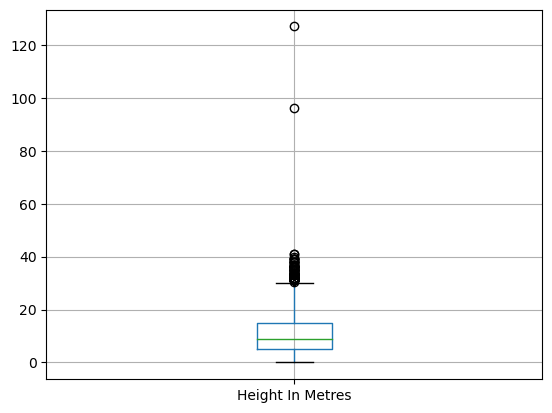

In [65]:
# Using a boxplot to find the outliers
trees.boxplot(column=['Height In Metres'])

In [66]:
# Selecting the crazy outlier rows
crazy_outliers=trees[trees["Height In Metres"]>60]
crazy_outliers

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
1356,00001547,1.0,Beaumont Walk Estate,Housing,Robinia pseudoacacia,2017-05-23,2020/2021,96.0,10.0,63.0,E05000136,Haverstock,527847,184391,-0.157739,51.543941,"(51.543941, -0.157739)"
1863,00013862,1.0,Maitland Park Estate 1,Housing,Prunus avium,2017-05-16,2020/2021,127.0,9.0,34.0,E05000136,Haverstock,527987,184901,-0.155534,51.548497,"(51.548497, -0.155534)"


<hr/>

### 5.2 Outliers for Spread
Now repeating the analysis for spread.


<AxesSubplot:>

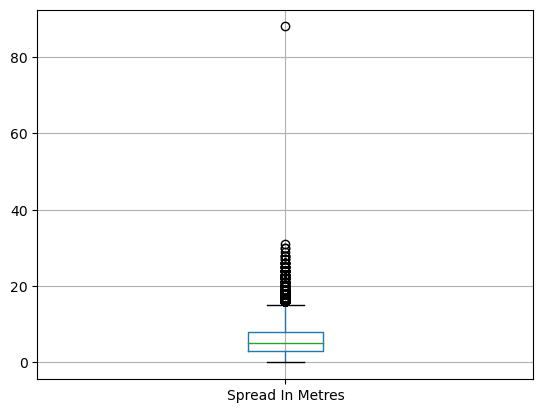

In [67]:
# Using a boxplot to find the outliers
trees.boxplot(column=['Spread In Metres'])

In [68]:
# Selecting the crazy outlier rows (if any)
crazy_outliers2=trees[trees["Spread In Metres"]>80]
crazy_outliers2

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
18567,00045515,1.0,Broadfield Estate 1,Housing,Quercus robur,2018-04-26,2021/2022,8.0,88.0,17.0,E05000144,Swiss Cottage,525993,184693,-0.184348,51.547074,"(51.547074, -0.184348)"


<hr/>

### 5.3 Outliers for Diameter
Now repeating the analysis for diameter.


<AxesSubplot:>

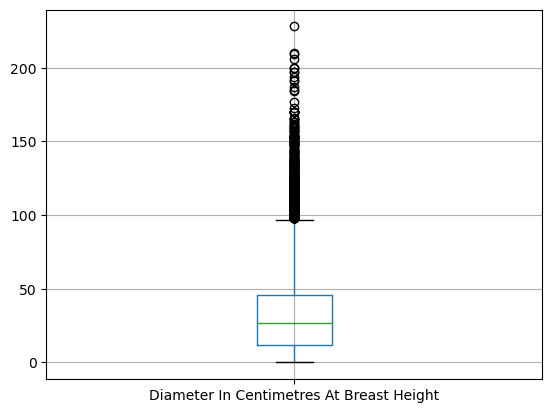

In [69]:
# Using a boxplot to find the outliers
trees.boxplot(column=['Diameter In Centimetres At Breast Height'])

In [70]:
# Selecting the outlier rows (if any)
crazy_outliers3=trees[trees["Diameter In Centimetres At Breast Height"]>300]
crazy_outliers3

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location


<hr/>

### 5.4 Observations




There ae 2 outliers for "Height in Metres" field which are more than 60 meters. There is only 1 outlier for "Spread in Metres" which is more than 80 m. There seems to be no outlier for "Diameter in cm at Breast Height". We made the assumption that most of the datapoints are correct and there can be no exception. This is a standard assumption and is highly unlikely to fail. There are no outliers for Diameter field.

<hr/>

## 6. Identify Duplicates in the Trees Dataset
Sometimes data has duplicate entries.  This is another sign of data quality issues!

### 6.1 Find Duplicate Rows

In our dataset the `Identifier` column should be unique.  Let us find out.



In [71]:
# Finding out if we have any duplicates
trees["Identifier"].value_counts()

00000999    2
00060087    2
00022744    2
00032549    2
00022674    2
           ..
00046158    1
00058373    1
00059181    1
00002274    1
00013369    1
Name: Identifier, Length: 23438, dtype: int64

In [72]:
# Selecting the rows that are duplicated
duplicates=trees[trees["Identifier"].map(trees["Identifier"].value_counts())>1]

In [73]:
# Number of duplicates
duplicates.shape

(12, 17)

<hr/>

### 6.2 Observations



There are 12 duplicates in the trees dataset based on the Identifier column.

<hr/>

## Task 7: Identify Geolocation Issues
The geographic coordinates (Easting and Northing) can be used to plot the trees on a map.  We can use this approach to see if there are any unusual tree locations!

We make a copy of the original trees dataset and remove any rows that have a missing easting or northing as these can't be plotted on the map. We then remove the nulls and zeroes from the dataset and plot the scatter plot between Northing and Easting.






### 7.1 Remove Trees with Missing Geo-coordinates
We check if there are any rows with null or 0 geo-coordinates.  If there are, we remove them as we can't plot these.



In [74]:
# Making a copy of the trees
geotrees = trees.copy()

In [75]:
# Removing null Eastings
geotrees=geotrees[~geotrees['Easting'].isnull()]

In [76]:
# Removing 0 Eastings.  
geotrees=geotrees.loc[~(geotrees['Easting']==0)]

In [77]:
# Removing null Northings
geotrees=geotrees[~geotrees['Northing'].isnull()]

In [78]:
# Removing 0 Northings.  
geotrees=geotrees.loc[~(geotrees['Northing']==0)]

In [79]:
# Confirming how many rows we have
geotrees.shape

(23388, 17)

<hr/>

### 7.2 Plot Map of Trees
Now we make the plot of Northing vs Easting. We obtain an outline of the map of Camden. We compare that outline with a real map of Camden and spot the trees that should not be in that dataset.



<AxesSubplot:xlabel='Easting', ylabel='Northing'>

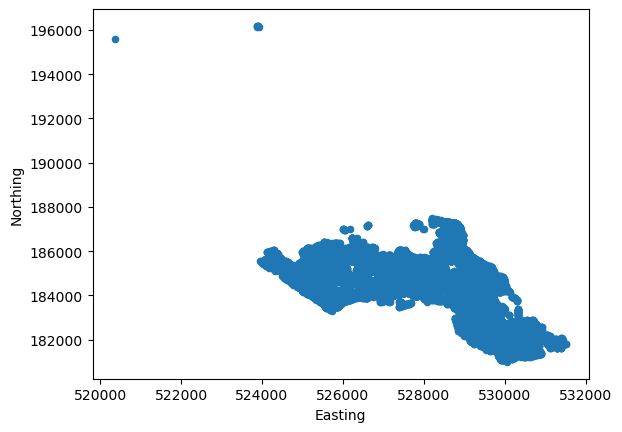

In [80]:
# Plotting the trees on a map
geotrees.plot.scatter(x='Easting', y="Northing")

### 7.3 Find Trees Outside Camden
From the scatter plot, we determine how to select the rows from the trees data set containing the offending trees (using the Easting and Northing values)

We select the rows containing trees outside of Camden. 


In [81]:
# Selecting the outlier rows
trees_out=trees[trees['Northing']>194000]
trees_out

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
78,00044991,1.0,Bells Hill Estate,Housing,Fraxinus excelsior,2017-04-28,2020/2021,20.0,10.0,49.0,NaN,NaN,523883,196179,-0.210713,51.650765,"(51.650765, -0.210713)"
298,00045000,1.0,Estate 167 Furzehill Road,Housing,Pinus sylvestris,2017-04-28,2020/2021,10.0,3.0,41.0,NaN,NaN,520367,195595,-0.261719,51.646283,"(51.646283, -0.261719)"
660,00044992,1.0,Bells Hill Estate,Housing,Crataegus monogyna,2017-04-28,2020/2021,4.0,4.0,7.0,NaN,NaN,523875,196170,-0.210830,51.650690,"(51.65069, -0.21083)"
1526,00044995,1.0,Bells Hill Estate,Housing,Fraxinus excelsior,2017-04-28,2020/2021,18.0,12.0,54.0,NaN,NaN,523936,196127,-0.209969,51.650287,"(51.650287, -0.209969)"
5392,00044990,1.0,Bells Hill Estate,Housing,Aesculus hippocastanum,2017-04-28,2020/2021,22.0,12.0,67.0,NaN,NaN,523889,196188,-0.210618,51.650843,"(51.650843, -0.210618)"
18069,00044993,1.0,Bells Hill Estate,Housing,Tilia cordata,2017-04-28,2020/2021,23.0,14.0,89.0,NaN,NaN,523867,196159,-0.210957,51.650590,"(51.65059, -0.210957)"
18078,00044601,1.0,Bells Hill Estate,Housing,Tilia cordata,2017-04-28,2020/2021,21.0,12.0,56.0,NaN,NaN,523905,196174,-0.210394,51.650719,"(51.650719, -0.210394)"
19532,00044988,1.0,Bells Hill Estate,Housing,Tilia cordata,2017-04-28,2020/2021,21.0,12.0,65.0,NaN,NaN,523909,196169,-0.210340,51.650676,"(51.650676, -0.21034)"


In [82]:
# Confirming how many rows we have
trees_out.shape

(8, 17)

<hr/>

### 7.4 Observations




There 23338 records after removing zeroes and nulls from Northing and Easting columns. After plotting the map, we see there are 8 trees which outside the Camden area (Northing > 194000).

<hr/>

## Task 8: Identify Unmatched Data
We have multiple datasets that will need to be joined together to produce the analyses required by the Camden Parks and Open Spaces team.  The data will need to be joined in the following way:

- Using the `Identifier` column in the trees dataset to match to the `Identifier` column in the environmental data set (so we can bring in the environmental data for each tree)
- Using the `Scientific Name` column in the trees dataset to match to the `Scientific Name` column in the common names data set (so we can look up the `Common Name`)

There may be mismatches in the data.  Of particular concern we want to check

- That every tree in the trees dataset has matching environmental data in the environmental data set
- That every environmental row in the environmental dataset has matching tree data in the tree data set
- That every scientific name in the trees dataset has a matching common name in the common names data set


### 8.1 Find Trees that Don't have Matching Environmental Data


In [83]:
# Finding trees that don't have matching environmental data
mask = ~trees['Identifier'].isin(trees_env['Identifier'])
newtrees=trees[mask]
newtrees

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
66,00059712,1.0,Maiden Lane Estate,Housing,Acer saccharinum,2019-05-28,2022/2023,12.0,5.0,20.0,E05000131,Cantelowes,529795,184142,-0.129750,51.541266,"(51.541266, -0.12975)"
125,00048578,1.0,BUCK STREET,Highways,Sorbus aucuparia,2017-07-19,2020/2021,6.0,2.0,10.0,E05000130,Camden Town with Primrose Hill,528900,184020,-0.142698,51.540371,"(51.540371, -0.142698)"
1148,00006577,1.0,FAWLEY ROAD,Highways,Tilia euchlora,2018-09-28,2021/2022,15.0,6.0,38.0,E05000145,West Hampstead,525572,185015,-0.190313,51.550062,"(51.550062, -0.190313)"
1998,00007366,1.0,"FORTUNE GREEN RD, OPEN SPACE (LS)",Parks,Ilex aquifolium,2017-03-21,2019/2020,9.0,6.0,44.0,E05000132,Fortune Green,525074,185541,-0.197304,51.554901,"(51.554901, -0.197304)"
2246,00014633,1.0,Mortimer Estate,Housing,Tilia europaea,2019-01-29,2021/2022,16.0,12.0,47.0,E05000140,Kilburn,525763,183613,-0.188060,51.537424,"(51.537424, -0.18806)"
5478,00060382,1.0,SHAFTESBURY AVENUE,Highways,Vacant Tree Pit,NaT,NaN,NaN,NaN,NaN,E05000138,Holborn and Covent Garden,530073,181247,-0.126813,51.515186,"(51.515186, -0.126813)"
10637,00002874,1.0,BURGHLEY ROAD,Highways,Platanus x hispanica,2017-08-14,2020/2021,20.0,8.0,52.0,E05000139,Kentish Town,529119,185889,-0.138863,51.557120,"(51.55712, -0.138863)"
10977,00055227,1.0,BURGHLEY ROAD,Highways,Amelanchier lamarckii,2017-08-14,2020/2021,3.0,2.0,5.0,E05000139,Kentish Town,528920,185694,-0.141802,51.555408,"(51.555408, -0.141802)"
11795,00016702,1.0,"RED LION SQUARE, GARDENS (LS)",Parks,Platanus x hispanica,2018-06-04,2021/2022,30.0,23.0,165.0,E05000138,Holborn and Covent Garden,530572,181701,-0.119460,51.519146,"(51.519146, -0.11946)"
11856,00054744,1.0,Carrol & Sanderson Close Estate,Housing,Prunus unidentified species,2017-01-06,2020/2021,3.0,3.0,13.0,E05000137,Highgate,528661,185556,-0.145585,51.554226,"(51.554226, -0.145585)"


In [84]:
# Confirming how many rows we have
newtrees.shape

(23, 17)

### 8.2 Find Environmental Data that Doesn't have Matching Tree Data


In [85]:
# Finding environmental data that doesn't have matching tree data
mask2 = ~trees_env['Identifier'].isin(trees['Identifier'])
newtrees2=trees_env[mask2]
newtrees2

,Identifier,Maturity,Physiological Condition,Tree Set To Be Removed,Removal Reason,Capital Asset Value For Amenity Trees,Carbon Storage In Kilograms,Gross Carbon Sequestration Per Year In Kilograms,Pollution Removal Per Year In Grams


In [86]:
# Confirming how many rows we have
newtrees2.shape

(0, 9)

### 8.3 Find Trees that Don't have Matching Common Names Data


In [87]:
# Finding trees with scientific names that don't have matching common names data
mask3 = ~trees['Scientific Name'].isin(trees_names['Scientific Name'])
newtrees3=trees[mask3]
newtrees3

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
151,00051832,1.0,ARGYLE WALK,Highways,Sorbus aucuparia 'Streetwise',2019-02-10,2022/2023,7.0,3.0,12.0,E05000141,King's Cross,530227,182706,-0.124054,51.528257,"(51.528257, -0.124054)"
384,00053954,1.0,CHURCHILL ROAD,Highways,Sorbus aucuparia 'Streetwise',2017-10-07,2020/2021,3.0,2.0,5.0,E05000139,Kentish Town,529007,185975,-0.140440,51.557913,"(51.557913, -0.14044)"
495,00047497,1.0,PATSHULL PLACE,Highways,Sorbus aucuparia 'Streetwise',2017-06-22,2020/2021,5.0,3.0,11.0,E05000131,Cantelowes,529202,184717,-0.138094,51.546569,"(51.546569, -0.138094)"
611,00055434,1.0,SHARPLES HALL STREET,Highways,Sorbus aucuparia 'Streetwise',2019-09-30,2022/2023,2.0,2.0,4.0,E05000130,Camden Town with Primrose Hill,527962,184050,-0.156202,51.540853,"(51.540853, -0.156202)"
653,00055289,1.0,QUEEN'S CRESCENT,Highways,Sorbus aucuparia 'Streetwise',2017-07-08,2020/2021,4.0,1.0,7.0,E05000136,Haverstock,528072,184723,-0.154369,51.546881,"(51.546881, -0.154369)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21826,00050835,1.0,INGESTRE RD,Highways,Sorbus aucuparia 'Streetwise',2017-08-18,2020/2021,3.0,1.0,7.0,E05000139,Kentish Town,528962,185826,-0.141137,51.556589,"(51.556589, -0.141137)"
22948,00052341,1.0,NEW COMPTON STREET,Highways,Sorbus aucuparia 'Streetwise',2019-07-08,2022/2023,4.0,3.0,6.0,E05000138,Holborn and Covent Garden,529976,181160,-0.128249,51.514422,"(51.514422, -0.128249)"
23266,00048846,1.0,ASMARA ROAD,Highways,Sorbus aucuparia 'Streetwise',2018-08-28,2021/2022,5.0,3.0,8.0,E05000132,Fortune Green,524568,185347,-0.204661,51.553268,"(51.553268, -0.204661)"
23335,00048705,1.0,GOLDINGTON STREET,Highways,Sorbus aucuparia 'Streetwise',2019-10-23,2022/2023,6.0,2.0,12.0,E05000143,St Pancras and Somers Town,529662,183417,-0.131941,51.534780,"(51.53478, -0.131941)"


In [88]:
# Confirming how many rows we have
newtrees3.shape

(76, 17)

<hr/>

### 8.4 Observations



There are 23 trees in trees dataset that don't have matching environment data and there are 76 trees in trees dataset that don't have matching common names.

<hr/>

# END OF NOTEBOOK